In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [ ]:
import numpy as np

A = np.fromfunction(lambda i, j: (i + j + 1) % 2, (6, 3), dtype=int)
B = np.zeros((6, 4), dtype=int)
B.flat = range(1, 25)
B[1::2] = B[1::2, ::-1]
np.random.seed(42)
C = np.random.randint(2, 11, size=(4, 3))
D = np.eye(4, dtype=int)
S_top = np.hstack((A, B))
S_bottom = np.hstack((C, D))
S = np.vstack((S_top, S_bottom))
F = np.zeros((10, 2), dtype=int)
G = np.hstack((S, F))

print("Матрица A:")
print(A)
print("\nМатрица B:")
print(B)
print("\nМатрица C:")
print(C)
print("\nМатрица D:")
print(D)
print("\nЛоскутная матрица S:")
print(S)
print("\nИтоговая матрица G:")
print(G)

## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [ ]:
import numpy as np

def find_nearest(X, a):
    return np.min(X[np.abs(X - a) == np.abs(X - a).min()])

X = np.array(eval(input("Введите матрицу X")))
a = float(input("Введите число a: "))

result = find_nearest(X, a)
print(f"Ближайший к числу {a} элемент в матрице: {result}")

## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [ ]:
import numpy as np

class StrangeNeuralNet:
    def __init__(self, A, b):

        self.A = A
        self.b = b

    def forward(self, X):

        A_squared = np.dot(self.A, self.A)
        intermediate_vector = np.dot(A_squared, X)
        output = np.dot(intermediate_vector, self.b)
        return output

N = int(input("Введите размерность матрицы N: "))
print("Введите матрицу A (каждая строка через пробел):")
A = np.array([list(map(float, input().split())) for _ in range(N)])
print("Введите вектор b (через пробел):")
b = np.array(list(map(float, input().split())))
print("Введите вектор признаков X (через пробел):")
X = np.array(list(map(float, input().split())))

net = StrangeNeuralNet(A, b)
result = net.forward(X)

print(f"Результат работы нейросети: {result}")

## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [ ]:
import numpy as np

M = np.array(eval(input("Введите карту местности M в формате [[...], [...], ...]: ")))

sea_cells_area = np.sum((M < 0) & (M < -5))

total_water_volume = np.sum(M[M < 0])

max_height = np.max(M[M > 0])

print(f"Общая площадь клеточек моря с глубиной больше 5 м: {sea_cells_area} м^2")
print(f"Общий объем всей воды на карте: {total_water_volume} м^3")
print(f"Максимальная высота над уровнем моря: {max_height} м")

In [9]:
import numpy as np

# Ввод карты местности (матрица)
M = np.array([[0, 0, 0, 10],
              [0, -6, -7, 0],
              [5, 3, 0, 0],
              [-3, -6, 4, 0]])

# Подсчет общей площади клеточек моря с глубиной больше 5 м
sea_cells_area = np.sum((M < 0) & (M < -5))

# Подсчет общего объема воды (в м^3)
total_water_volume = np.sum(M[M < 0])

# Подсчет максимальной высоты над уровнем моря
max_height = np.max(M[M > 0])

# Вывод результатов
print(f"Общая площадь клеточек моря с глубиной больше 5 м: {sea_cells_area} м^2")
print(f"Общий объем всей воды на карте: {total_water_volume} м^3")
print(f"Максимальная высота над уровнем моря: {max_height} м")



Общая площадь клеточек моря с глубиной больше 5 м: 3 м^2
Общий объем всей воды на карте: -22 м^3
Максимальная высота над уровнем моря: 10 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [ ]:
import numpy as np

def count_islands(a):

    a = np.pad(a, (1, 1), 'constant', constant_values=0)

    diff = np.diff(a)

    num_islands = np.sum(diff == 1)

    return num_islands

a = np.array(list(map(int, input("Введите массив из нулей и единиц через пробел: ").split())))

result = count_islands(a)

print(f"Количество островков: {result}")

In [10]:
import numpy as np

def count_islands(a):
    a = np.pad(a, (1, 1), 'constant', constant_values=0)  # Добавляем 0 по краям
    diff = np.diff(a)  # Вычисляем разницу между соседними элементами
    num_islands = np.sum(diff == 1)  # Считаем, где разница равна 1 (т.е. начало островка)
    return num_islands

# Пример массива
a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# Подсчитаем количество островков
result = count_islands(a)

# Выводим результат
print(f"Количество островков: {result}")


Количество островков: 4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [ ]:
import numpy as np

def replace_greater_than_a(X, a):

    mean_value = np.mean(X)

    X[X > a] = mean_value

    return X

X = np.array(eval(input("Введите матрицу X")))
a = float(input("Введите число a: "))

result = replace_greater_than_a(X, a)

print("Матрица после замены элементов:")
print(result)

In [11]:
import numpy as np

def replace_greater_than_a(X, a):
    mean_value = np.mean(X)  # Находим среднее значение матрицы
    X[X > a] = mean_value  # Заменяем все элементы, которые больше a, на среднее значение
    return X

# Пример матрицы X и числа a
X = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# Применяем функцию
result = replace_greater_than_a(X, a)

# Выводим результат
print("Матрица после замены элементов:")
print(result)


Матрица после замены элементов:
[[-7 -3 -1  0]
 [-4 -3  1  2]
 [-2  0  4  2]
 [-1  3  2  2]]


## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [ ]:
import numpy as np

def diagonal_difference(M):

    main_diag_sum = np.trace(M)

    secondary_diag_sum = np.trace(np.fliplr(M))

    return main_diag_sum - secondary_diag_sum

M = np.array(eval(input("Введите квадратную матрицу M: ")))

result = diagonal_difference(M)

print(f"Разница между суммой по главной и побочной диагоналям: {result}")

In [12]:
import numpy as np

def diagonal_difference(M):
    main_diag_sum = np.trace(M)  # Сумма элементов главной диагонали
    secondary_diag_sum = np.trace(np.fliplr(M))  # Сумма элементов побочной диагонали
    return main_diag_sum - secondary_diag_sum

# Пример квадратной матрицы M
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# Применяем функцию
result = diagonal_difference(M)

# Выводим результат
print(f"Разница между суммой по главной и побочной диагоналям: {result}")


Разница между суммой по главной и побочной диагоналям: 3


## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [18]:
import numpy as np

def create_mountain(a):
    N = len(a)

    # Создание матрицы из суммы элементов вектора a
    center = np.add.outer(a, a)  # создаем матрицу N x N

    # Используем np.block для создания симметричной матрицы
    mountain = np.block([
        [center, np.fliplr(center)],  # верхняя часть: center и его зеркальное отражение
        [np.flipud(center), np.flipud(np.fliplr(center))]  # нижняя часть: зеркальное отражение по обеим осям
    ])

    return mountain


In [13]:
import numpy as np

def create_mountain(a):
    N = len(a)
    center = np.add.outer(a, a)
    mountain = np.block([
        [center, np.fliplr(center)],
        [np.flipud(center), np.flipud(np.fliplr(center))]
    ])
    return mountain

# Пример вектора a
a = np.array([0, 1, 2])

# Применяем функцию для создания симметричной матрицы
result = create_mountain(a)

# Выводим результат
print(result)


[[0 1 2 2 1 0]
 [1 2 3 3 2 1]
 [2 3 4 4 3 2]
 [2 3 4 4 3 2]
 [1 2 3 3 2 1]
 [0 1 2 2 1 0]]


## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [ ]:
import numpy as np

def apply_blur(P, C):
    N, M = P.shape

    result = np.zeros((N - C + 1, M - C + 1))

    for i in range(N - C + 1):
        for j in range(M - C + 1):

            submatrix = P[i:i+C, j:j+C]

            result[i, j] = np.mean(submatrix)

    return result

P = np.array(eval(input("Введите матрицу P (черно-белое изображение): ")))
C = int(input("Введите число C (размер окна): "))

blurred_image = apply_blur(P, C)

print("Результат размытия изображения:")
print(blurred_image)

In [14]:
import numpy as np

def apply_blur(P, C):
    N, M = P.shape
    result = np.zeros((N - C + 1, M - C + 1))
    for i in range(N - C + 1):
        for j in range(M - C + 1):
            submatrix = P[i:i+C, j:j+C]
            result[i, j] = np.mean(submatrix)
    return result

# Пример матрицы P (черно-белое изображение)
P = np.array([
    [10, 20, 30, 40],
    [50, 60, 70, 80],
    [90, 100, 110, 120]
])

# Размер окна для размытия
C = 2

# Применяем размытие
blurred_image = apply_blur(P, C)

# Выводим результат
print("Результат размытия изображения:")
print(blurred_image)


Результат размытия изображения:
[[35. 45. 55.]
 [75. 85. 95.]]


## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [ ]:
import numpy as np

def can_be_added(*shapes):
    shapes = [np.array(shape) for shape in shapes]

    for i in range(1, len(shapes)):
        shape1, shape2 = shapes[i - 1], shapes[i]

        if not np.all((shape1[-len(shape2):] == shape2) | (shape1[-len(shape2):] == 1) | (shape2 == 1)):
            return False

    return True

num_matrices = int(input("Введите количество матриц: "))
shapes = []

for i in range(num_matrices):
    shape = tuple(map(int, input(f"Введите размерность матрицы {i + 1}: ").split()))
    shapes.append(shape)

if can_be_added(*shapes):
    print("Матрицы могут быть сложены с использованием broadcasting.")
else:
    print("Матрицы не могут быть сложены с использованием broadcasting.")

In [15]:
import numpy as np

def can_be_added(*shapes):
    shapes = [np.array(shape) for shape in shapes]

    for i in range(1, len(shapes)):
        shape1, shape2 = shapes[i - 1], shapes[i]

        # Проверяем, что последние размеры совпадают или могут быть приведены к единичному размеру для broadcasting
        if not np.all((shape1[-len(shape2):] == shape2) | (shape1[-len(shape2):] == 1) | (shape2 == 1)):
            return False
    return True

# Пример: задаем размеры матриц
shapes = [
    (5, 6, 7),
    (6, 7),
    (1, 7)
]

if can_be_added(*shapes):
    print("Матрицы могут быть сложены с использованием broadcasting.")
else:
    print("Матрицы не могут быть сложены с использованием broadcasting.")


Матрицы могут быть сложены с использованием broadcasting.


## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [ ]:
import numpy as np

def pairwise_distances(A, B):
    return np.sqrt(np.sum((A[:, np.newaxis, :] - B)**2, axis=2))

m, k = map(int, input("Введите размеры матрицы A (m и k через пробел): ").split())
A = []
print(f"Введите {m} строк для матрицы A, каждая из {k} элементов:")
for _ in range(m):
    row = list(map(float, input().split()))
    A.append(row)
A = np.array(A)

n, k2 = map(int, input("Введите размеры матрицы B (n и k через пробел): ").split())
if k != k2:
    raise ValueError("Число столбцов в A должно совпадать с числом столбцов в B!")
B = []
print(f"Введите {n} строк для матрицы B, каждая из {k} элементов:")
for _ in range(n):
    row = list(map(float, input().split()))
    B.append(row)
B = np.array(B)

result = pairwise_distances(A, B)

print("Матрица попарных евклидовых расстояний:")
print(result)

In [ ]:
A = # TODO
B = # TODO

pairwise_distances(A, B)

Объясни принцип работы этой одной строчки. Что именно происходит в ней?

<font color='red'> В этой одной строчке:

return np.sqrt(np.sum((A[:, np.newaxis, :] - B)**2, axis=2))
реализуется вычисление попарных евклидовых расстояний между строками двух матриц A и B с использованием broadcasting в numpy. Давайте разберём поэтапно, что происходит в этой строчке:

1. A[:, np.newaxis, :]
Это выражение добавляет новую ось в матрицу A, превращая её размерность с (m, k) на (m, 1, k).

A — матрица размером m x k.
np.newaxis добавляет новую ось, что позволяет "расширить" её до размерности (m, 1, k). Это необходимо для дальнейшего вычитания с матрицей B.
Зачем это нужно?

Это нужно, чтобы можно было вычесть каждый вектор из матрицы A из каждого вектора из матрицы B. С помощью broadcasting это делается автоматически.
2. A[:, np.newaxis, :] - B
Это операция вычитания между каждым вектором из A и каждым вектором из B с использованием broadcasting:

Теперь A[:, np.newaxis, :] имеет размерность (m, 1, k), а B — (n, k).
Broadcasting позволяет расширить матрицу B до формы (m, n, k), чтобы можно было вычесть все строки B из всех строк A.
Результат:

После вычитания получится массив размером (m, n, k), где каждый элемент является разностью соответствующих элементов из строк матриц A и B.
3. (A[:, np.newaxis, :] - B)**2
Каждое число в результате вычитания возводится в квадрат:

Операция **2 выполняет возведение в квадрат разности между соответствующими элементами векторов.
Результат:

Мы получаем массив размерности (m, n, k), где каждый элемент является квадратом разности.
4. np.sum((A[:, np.newaxis, :] - B)**2, axis=2)
Здесь происходит суммирование по последней оси (по всем k-элементам вектора):

Мы суммируем квадрат разностей для каждого вектора в строках A и B. Это нужно для вычисления евклидова расстояния, где суммируются квадраты разностей по всем координатам вектора.
Результат:

Мы получаем матрицу размерности (m, n), где каждый элемент в позиции (i, j) представляет собой сумму квадратов разностей между векторами A[i] и B[j].
5. np.sqrt(np.sum((A[:, np.newaxis, :] - B)**2, axis=2))
Последний шаг — это извлечение квадратного корня из суммы квадратов разностей:

Мы берем квадратный корень из полученной суммы квадратов, чтобы получить евклидово расстояние.
Результат:

В результате получаем матрицу размерности (m, n), где каждый элемент представляет собой евклидово расстояние между строкой i из матрицы A и строкой j из матрицы B.
Итог:
Эта строка вычисляет матрицу попарных евклидовых расстояний между строками двух матриц A и B. Это делается с использованием broadcasting и векторизации, что делает решение эффективным и быстрым, особенно для больших матриц. </font>

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [ ]:
import pandas as pd

data = {
    'N': [4, 4, 4, 4, 4],
    't, sec': [268, 264, 275, 263, 267],
    'sigma_t, sec': [1, 1, 1, 1, 1],
    'mass, gramm': [180.0, 180.0, 180.0, 180.0, 180.0],
    'length, cm': [121.0, 121.0, 121.0, 121.0, 121.0],
    'phi, rad': [0.16, 0.18, 0.16, 0.17, 0.17]
}

df = pd.DataFrame(data)

print(df)

,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
1,4,268,1,180.0,121.0,0.16
2,4,264,1,180.0,121.0,0.18
3,4,275,1,180.0,121.0,0.16
4,4,263,1,180.0,121.0,0.17
5,4,267,1,180.0,121.0,0.17


## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [ ]:
import pandas as pd

data = {
    'N': [4, 4, 4, 4, 4],
    't, sec': [268, 264, 275, 263, 267],
    'sigma_t, sec': [1, 1, 1, 1, 1],
    'mass, gramm': [180.0, 180.0, 180.0, 180.0, 180.0],
    'length, cm': [121.0, 121.0, 121.0, 121.0, 121.0],
    'phi, rad': [0.16, 0.18, 0.16, 0.17, 0.17]
}

df = pd.DataFrame(data)

df['mass'] = df['mass, gramm'] / 1000

df['length'] = df['length, cm'] / 100

df = df.rename(columns={
    'N': 'N',
    't, sec': 'time',
    'sigma_t, sec': 'time_error',
    'mass, gramm': 'mass',
    'length, cm': 'length',
    'phi, rad': 'angle'
})

print(df)

Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [ ]:
import pandas as pd
import numpy as np

data = {
    'N': [4, 4, 4, 4, 4],
    'time': [268, 264, 275, 263, 267],
    'time_error': [1, 1, 1, 1, 1],
    'mass': [0.18, 0.18, 0.18, 0.18, 0.18],
    'length': [1.21, 1.21, 1.21, 1.21, 1.21],
    'angle': [0.16, 0.18, 0.16, 0.17, 0.17]
}

df = pd.DataFrame(data)

g = 9.8

df['omega'] = (2 * np.pi * df['N']) / df['time']
df['sigma_omega'] = (df['omega'] / df['time']) * df['time_error']
df['omega_down'] = df['angle'] / df['time']
df['sigma_down'] = (df['omega_down'] * df['time_error']) / df['time']
df['momentum'] = df['mass'] * g * df['length']
df['momentum_down'] = df['mass'] * df['angle'] * (df['time'] ** 2) / (df['length'] ** 2)
df['sigma_momentum'] = df['momentum_down'] * 2 * df['time_error'] / df['time']

print(df)


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [ ]:
import pandas as pd
import numpy as np

data = {
    'N': [4, 4, 4, 4, 4],
    'time': [268, 264, 275, 263, 267],
    'time_error': [1, 1, 1, 1, 1],
    'mass': [0.18, 0.18, 0.18, 0.18, 0.18],
    'length': [1.21, 1.21, 1.21, 1.21, 1.21],
    'angle': [0.16, 0.18, 0.16, 0.17, 0.17]
}

df = pd.DataFrame(data)

g = 9.8

df['omega'] = (2 * np.pi * df['N']) / df['time']
df['sigma_omega'] = (df['omega'] / df['time']) * df['time_error']
df['omega_down'] = df['angle'] / df['time']
df['sigma_down'] = (df['omega_down'] * df['time_error']) / df['time']
df['momentum'] = df['mass'] * g * df['length']
df['momentum_down'] = df['mass'] * df['angle'] * (df['time'] ** 2) / (df['length'] ** 2)
df['sigma_momentum'] = df['momentum_down'] * 2 * df['time_error'] / df['time']

averages = df.groupby('mass')[['omega', 'sigma_omega', 'momentum', 'momentum_down']].mean()

print(averages)

## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

In [19]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)


x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)

fig = plt.figure(figsize=(12, 8))

coefs = np.polyfit(momentum_np, omega_np, 1)
y_lsq = np.polyval(coefs, x_lsq)

fig = plt.figure(figsize=(12, 8))
plt.plot(momentum_np, omega_np, 'o', label='Experimental data')
plt.plot(x_lsq, y_lsq, '-', label=f'Fit: y = {coefs[0]:.2f}x + {coefs[1]:.2f}')
plt.xlabel('Momentum (kg*m^2/s)', fontsize=14)
plt.ylabel('Omega (rad/s)', fontsize=14)
plt.title('Angular Velocity vs. Momentum', fontsize=18)
plt.grid(True)
plt.legend()
plt.show()



NameError: name 'grouped_data' is not defined

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

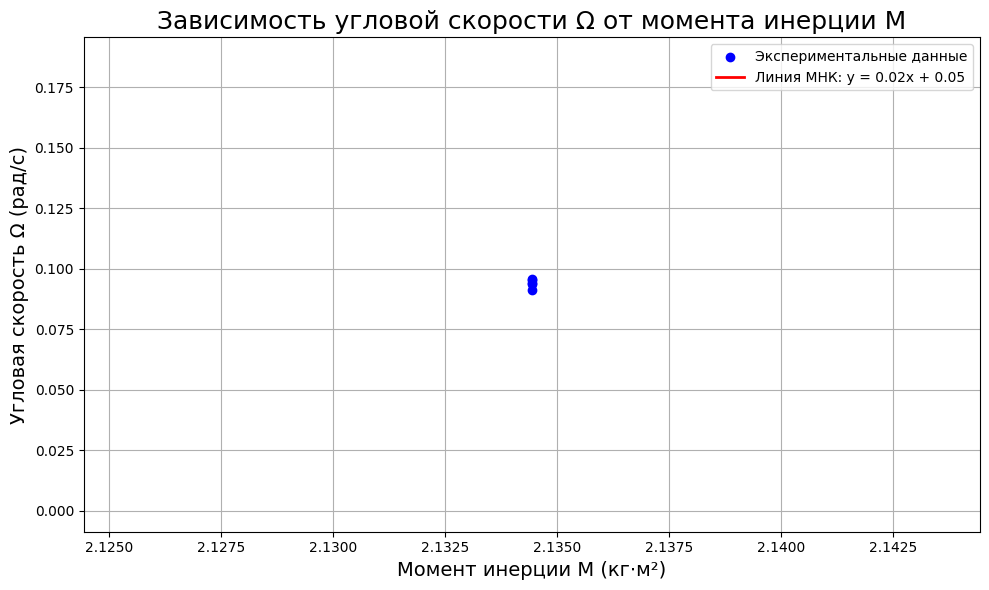

Коэффициенты прямой: a = 0.02, b = 0.05


IndexError: index 0 is out of bounds for axis 0 with size 0

In [7]:
grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10




Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

In [8]:
omega_down_np = np.array(grouped_data.omega_down)
momentum_down_np = np.array(grouped_data.momentum_down)

coefs, cov = np.polyfit(momentum_down_np, omega_down_np, 1, cov=True)

x_lsq = np.linspace(momentum_down_np.min() * 0.3, momentum_down_np.max() * 1.1, 100)

lsq_stds = np.sqrt(np.diag(cov))

y_lsq = np.polyval(coefs, x_lsq)
y_lsq_lower = np.polyval([coefs[0] - lsq_stds[0], coefs[1] - lsq_stds[1]], x_lsq)
y_lsq_upper = np.polyval([coefs[0] + lsq_stds[0], coefs[1] + lsq_stds[1]], x_lsq)

fig = plt.figure(figsize=(12, 8))
plt.errorbar(momentum_down_np, omega_down_np, yerr=grouped_data.sigma_down, fmt='o', label='Experimental data')
plt.plot(x_lsq, y_lsq, '-', label=f'Fit: y = {coefs[0]:.2f}x + {coefs[1]:.2f}')
plt.fill_between(x_lsq, y_lsq_lower, y_lsq_upper, color='gray', alpha=0.2, label='Confidence interval')
plt.xlabel('Momentum Down (kg*m^2/s^2)', fontsize=14)
plt.ylabel('Omega Down (rad/s)', fontsize=14)
plt.title('Omega Down vs. Momentum Down', fontsize=18)
plt.grid(True)
plt.legend()
plt.show()

ValueError: too many values to unpack (expected 2)

# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [ ]:
sns.set_style("darkgrid")

In [ ]:
import pandas as pd

data = {
    "Id": [1, 2, 3, 4, 5],
    "SepalLengthCm": [5.1, 4.9, 4.7, 4.6, 5.0],
    "SepalWidthCm": [3.5, 3.0, 3.2, 3.1, 3.6],
    "PetalLengthCm": [1.4, 1.4, 1.3, 1.5, 1.4],
    "PetalWidthCm": [0.2, 0.2, 0.2, 0.2, 0.2],
    "Species": ["Iris-setosa"] * 5
}

df = pd.DataFrame(data)

print(df)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import pandas as pd

data = {
    "Id": [1, 2, 3, 4, 5],
    "SepalLengthCm": [5.1, 4.9, 4.7, 4.6, 5.0],
    "SepalWidthCm": [3.5, 3.0, 3.2, 3.1, 3.6],
    "PetalLengthCm": [1.4, 1.4, 1.3, 1.5, 1.4],
    "PetalWidthCm": [0.2, 0.2, 0.2, 0.2, 0.2],
    "Species": ["Iris-setosa"] * 5
}

df = pd.DataFrame(data)

df = df.drop("Id", axis=1)

print(df)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [ ]:
import pandas as pd

data = {
    "SepalLengthCm": [5.1, 4.9, 4.7, 4.6, 5.0] * 30,
    "SepalWidthCm": [3.5, 3.0, 3.2, 3.1, 3.6] * 30,
    "PetalLengthCm": [1.4, 1.4, 1.3, 1.5, 1.4] * 30,
    "PetalWidthCm": [0.2, 0.2, 0.2, 0.2, 0.2] * 30,
    "Species": ["Iris-setosa"] * 50 + ["Iris-versicolor"] * 50 + ["Iris-virginica"] * 50,
}

df = pd.DataFrame(data)

species_counts = df["Species"].value_counts()

print(species_counts)

## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Загружаем данные из sklearn
iris = load_iris()
df = pd.DataFrame(
    data=iris.data,
    columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
)
df["Species"] = [iris.target_names[i] for i in iris.target]

# Построение scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="PetalLengthCm",
    y="PetalWidthCm",
    hue="Species",
    palette="muted"
)

# Подписи к графику
plt.title("Зависимость ширины и длины лепестков у ирисов", fontsize=14)
plt.xlabel("Длина лепестка (см)", fontsize=12)
plt.ylabel("Ширина лепестка (см)", fontsize=12)
plt.legend(title="Вид")
plt.grid(True)

# Отображение графика
plt.show()

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='red'>Выводы из графика:
Взаимосвязь между шириной и длиной лепестков:
У Iris-setosa лепестки короткие и узкие, их точки располагаются компактно и не пересекаются с другими видами.
У Iris-versicolor лепестки средней длины и ширины, данные для этого вида частично перекрываются с Iris-virginica.
У Iris-virginica лепестки длинные и широкие, значения этого вида перекрываются с Iris-versicolor.
Линейная разделимость:
Iris-setosa линейно отделим от других видов, так как его точки расположены обособленно.
Iris-versicolor и Iris-virginica не линейно отделимы — их данные перекрываются, что делает классификацию сложной.
Чего не хватает графику, чтобы он был более информативным:
Размер точек:
На графике точки имеют одинаковый размер, это усложняет восприятие плотности данных. Можно варьировать размер точек для отображения дополнительной информации, например, количества перекрывающихся значений.
Пояснительная статистика:
График не показывает средние значения, разброс или диапазоны для каждой группы. Добавление таких элементов (например, эллипсов ковариации или медианных линий) могло бы лучше визуализировать различия между группами.
Прозрачность точек:
При плотных данных перекрытие точек делает график менее читабельным. Добавление прозрачности (alpha) позволит видеть плотность данных.
Области классификации:
Графику не хватает областей классификации или граничных линий, которые могли бы показать, как можно разделить виды ирисов на основе их признаков. Это может быть полезно, если данные используются в машинном обучении.
Дополнительные признаки:
График отображает только два признака — ширину и длину лепестков. Добавление третьего признака, например, цвета или формы точек для ширины или длины чашелистика, могло бы сделать анализ глубже.
Как улучшить график:
Добавить прозрачность точек:
sns.scatterplot(..., alpha=0.7)
Нанести эллипсы или доверительные интервалы:
sns.kdeplot(..., fill=True)
Использовать интерактивные графики (например, с Plotly) для отображения дополнительных признаков или 3D-графики:
fig = px.scatter_3d(...)
Эти улучшения позволят визуализировать данные более наглядно и дать больше полезной информации для анализа.</font>

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Загружаем данные из sklearn
iris = load_iris()
df = pd.DataFrame(
    data=iris.data,
    columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
)
df["Species"] = [iris.target_names[i] for i in iris.target]

# Построение jointplot
sns.jointplot(
    data=df,
    x="PetalLengthCm",
    y="PetalWidthCm",
    hue="Species",
    kind="scatter",
    palette="muted",
    height=8
)

# Отображение графика
plt.show()

In [ ]:
# Построение FacetGrid
g = sns.FacetGrid(df, hue="Species", height=6, palette="muted")
g.map(plt.scatter, "PetalLengthCm", "PetalWidthCm", alpha=0.7)

# Добавляем легенду
g.add_legend()

# Подписи
g.fig.suptitle("Зависимость ширины и длины лепестков (FacetGrid)", fontsize=14)
g.set_axis_labels("Длина лепестка (см)", "Ширина лепестка (см)")

# Отображение графика
plt.show()

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='red'> Выводы из графиков:
1. sns.scatterplot:
Особенности: Этот график показывает простое рассеяние данных с выделением точек по цветам, в зависимости от вида ириса. Он наглядно отображает, как ширина и длина лепестков связаны между собой.Анализ:
Iris-setosa имеет четко разделенные точки, которые не пересекаются с другими видами. Это подтверждает линейную разделимость этого вида.Iris-versicolor и Iris-virginica имеют больше перекрывающихся точек, что указывает на нелинейную разделимость этих видов.

2. sns.jointplot:
Особенности: График сочетает рассеяние и гистограммы для каждого из признаков. Он позволяет увидеть как плотность данных, так и распределение значений на осях.Анализ:
Iris-setosa явно выделяется как отдельная группа с ограниченным диапазоном значений как по длине, так и по ширине лепестков.Iris-versicolor и Iris-virginica имеют пересекающиеся области плотности, что указывает на сложности в их разделении.
Гистограммы на осях показывают распределение значений и помогают понять диапазоны для каждого вида.

3. sns.FacetGrid:Особенности: Этот график разделяет данные по видам ирисов в виде нескольких подграфиков, где каждый вид представлен отдельным цветом. Он позволяет наглядно увидеть распределение данных по каждому виду.
Анализ:Каждый вид на отдельном графике позволяет более детально увидеть, как распределены данные внутри каждого класса.
Iris-setosa легко отделяется, а для Iris-versicolor и Iris-virginica видно, что данные сильно пересекаются.

Сравнение методов:1. scatterplot:
Преимущества: Простота, визуальная наглядность, можно быстро увидеть рассеяние точек по двум признакам.Недостатки: Не отображает плотность данных и не помогает с распределением значений на осях. Трудно оценить, насколько сильно пересекаются группы.
2. jointplot:
Преимущества: Этот метод сочетает в себе рассеяние и распределение значений. Он отлично показывает как плотность данных, так и их взаимосвязь.Недостатки: Иногда может быть перегружен информацией, особенно если на графике много данных (например, плотные распределения).
3. FacetGrid:
Преимущества: Отлично подходит для отображения данных по категориям (видам), визуализируя каждый вид отдельно. Это позволяет легко сравнивать различные группы и их распределения.Недостатки: Меньше информативности в плане плотности данных и взаимосвязи признаков, чем в случае с jointplot. Потребуется больше времени для создания, если данных много.
Какой метод лучше?
Лучший метод зависит от задачи:Если цель — увидеть взаимосвязь между признаками (например, как ширина и длина лепестков взаимосвязаны), jointplot будет самым полезным. Он сочетает рассеяние точек с плотностью данных и гистограммами, что помогает лучше понять, как данные распределяются и как они связаны.
Если важно увидеть, как данные разделены по категориям, то FacetGrid будет предпочтительнее. Он позволяет наглядно сравнивать отдельные группы и их поведение.Если нужна простая визуализация взаимосвязи без лишней информации, scatterplot — это самый быстрый и понятный вариант.

Для вашего случая, если задача — оценить взаимосвязь и разделимость видов ирисов, то jointplot и FacetGridпредставляют наибольшую ценность, поскольку они дают больше информации о плотности данных и распределении по категориям. scatterplot же полезен, если нужно просто увидеть общую картину без подробной статистики. </font>

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Загружаем данные из sklearn
iris = load_iris()
df = pd.DataFrame(
    data=iris.data,
    columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
)
df["Species"] = [iris.target_names[i] for i in iris.target]

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Species",
    y="PetalLengthCm",  # Можно изменить на любой другой признак
    data=df,
    palette="muted"
)

# Подписи
plt.title("График ящика с усами (Boxplot) для длины лепестка", fontsize=14)
plt.xlabel("Вид ириса", fontsize=12)
plt.ylabel("Длина лепестка (см)", fontsize=12)

# Отображение графика
plt.show()

In [ ]:
# Построение violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(
    x="Species",
    y="PetalLengthCm",  # Можно изменить на любой другой признак
    data=df,
    palette="muted"
)

# Подписи
plt.title("Скрипичный график (Violinplot) для длины лепестка", fontsize=14)
plt.xlabel("Вид ириса", fontsize=12)
plt.ylabel("Длина лепестка (см)", fontsize=12)

# Отображение графика
plt.show()

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='red'> 1. Boxplot (График "ящика с усами")
Особенности:
Основные элементы: медиана, 1-й и 3-й квартиль, минимальные и максимальные значения (без выбросов), а также выбросы (если они есть).Этот график дает основные статистические данные о распределении данных: он показывает, как распределены данные и выделяет возможные выбросы.
Преимущества:
Простота: Boxplot — это классический инструмент для статистического анализа, который легко интерпретировать. Он хорошо подходит для отображения межквартильного размаха и выявления выбросов.
Интуитивность: Очень наглядно показывается медиана, разброс значений и выбросы.Ровная структура: Подходит для простого сравнения нескольких групп (например, видов ирисов).
Недостатки:
Отсутствие информации о плотности: Не показывает, как данные распределены внутри каждого квартиля или между ними, а также не отображает форму распределения (например, нормальность или асимметрию).
Меньше деталей: Хотя это даёт основные статистики, но не дает полной картины о "форме" данных.
2. Violinplot (Скрипичный график)Особенности:
Основные элементы: Показывает как распределение данных (с помощью плотности) в виде "скрипки" с зеркальной симметрией, а также основные статистические элементы, такие как медиана и квартиль.
Скрипичный график включает не только данные о медиане и разбросе, но и визуализирует форму распределения данных (например, расплата с одной или несколькими вершинами).
Преимущества:
Детальная информация о плотности распределения: Violinplot предоставляет более подробную информацию о форме распределения данных, например, наличие нескольких пиков, асимметрию и "плотность" распределения.Гибкость: Этот график полезен, когда важно не только понять размах данных, но и увидеть, как они сгруппированы в пределах каждого квартиля, какие области имеют большую плотность.
Визуально привлекательный: Является более "красивым" и сложным визуально, что может привлекать внимание и быть полезным при презентации.
Недостатки:
Сложность интерпретации: Для менее опытных пользователей или в случаях с большими объемами данных может быть сложнее сразу понять плотность распределения, особенно если форма графика сложная или сильно ассиметрична.Перегрузка информации: Может быть менее информативным в некоторых случаях, если плотность распределения данных не предоставляет существенной информации.
Сравнение по информативности
Boxplot:
Более информативен для базового статистического анализа, поскольку чётко показывает медиану, квартильный размах и выбросы.Он идеален для быстрого сравнения различных групп, например, для проверки наличия выбросов и оценки расхождения данных по видам.

Violinplot:
Дает более глубокое понимание данных, поскольку дополнительно показывает плотность распределения, позволяя выявить особенности распределения, такие как мультипик или асимметричные данные.Лучше подходит для анализа формы данных и выявления закономерностей, не видимых на простом ящике с усами.

Сравнение по визуальной привлекательности
Boxplot: Это простой и чистый график, который часто используется в аналитике данных для представления основных статистик. Хотя он информативен, его внешний вид довольно функционален и не всегда зрелищен.
Violinplot: Выглядит более эстетично и привлекательно, его визуальная сложность (формы "скрипки") делает его более эффектным. Он хорошо подходит для презентаций и визуализаций, где важно не только показать данные, но и сделать их представление интересным.
Какую информацию можно получить из этих графиков?
Boxplot:
Медиана: центральное значение для каждого вида ириса.Размах: минимальное и максимальное значение (кроме выбросов).
Квартильный размах: верхний и нижний квартиль показывают разброс данных.Выбросы: точки, выходящие за пределы усов, указывают на возможные аномалии в данных.

Violinplot:
Плотность распределения: показывает, где сосредоточены данные (например, пики на графике могут указывать на области высокой плотности).Медиана и квартиль: как и в boxplot, но также показываются распределения внутри этих областей.
Форма распределения: позволяет увидеть, есть ли у данных одна основная вершина, несколько пиков или

асимметричные распределения.

Заключение:Для статистического анализа и быстрого получения основных показателей (медианы, размаха, выбросов) boxplot будет более полезен.
Для глубокого анализа распределения данных (например, проверки асимметрии, многомодальности) и визуально привлекательных графиков violinplot будет лучшим выбором.
Лично для меня:
Boxplot — это отличный инструмент для статистического анализа, когда нужно быстро оценить ключевые статистики.Violinplot — более привлекательный и информативный с точки зрения визуализации плотности распределений, и я бы выбрал его для более детальных презентаций или анализа. </font>

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Загружаем данные из sklearn
iris = load_iris()
df = pd.DataFrame(
    data=iris.data,
    columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
)
df["Species"] = [iris.target_names[i] for i in iris.target]

# Построение pairplot
sns.pairplot(
    df,
    hue="Species",  # Разделение точек по видам ирисов
    palette="muted",  # Цветовая палитра для видов
    height=2.5,  # Размер графиков
)

# Отображение графика
plt.show()

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='red'> 1. Длина и ширина лепестков (Petal Length и Petal Width)
Явная корреляция: Графики, показывающие пары длины и ширины лепестков, обычно демонстрируют явную положительную корреляцию. Чем больше длина лепестка, тем больше его ширина. Эта зависимость видна на диагональном графике и на недиагональных графиках.
Четкое разделение классов: Iris-setosa легко отделяется от других видов по этим признакам. Для него существует небольшой разброс по длине и ширине лепестков, но в целом, данные этого вида имеют узкие диапазоны.
Iris-versicolor и Iris-virginica: Эти два вида перекрываются, что подтверждает, что они не всегда легко разделимы по длине и ширине лепестков, особенно в промежуточных значениях.
2. Длина и ширина чашелистика (Sepal Length и Sepal Width)
Низкая корреляция: Между длиной и шириной чашелистика корреляция намного слабее. Графики для этих признаков показывают более случайное распределение точек.
Разделимость видов: Вид Iris-setosa снова отличается от других видов. Однако Iris-versicolor и Iris-virginica имеют схожие диапазоны значений и довольно сильно перекрываются, что затрудняет их разделение по этим признакам.
Группировка по видам: Для Iris-setosa наблюдается четкое разделение с другими видами, особенно в паре "Длина чашелистика - Ширина чашелистика". Эти два признака позволяют легче отделить этот вид от остальных.
3. Взаимосвязь между лепестками и чашелистиками
Отсутствие сильной корреляции: Признаки длины и ширины чашелистика имеют слабую корреляцию с длиной и шириной лепестков. Это видно по графикам для пар признаков (например, "Длина чашелистика - Длина лепестка" или "Ширина чашелистика - Ширина лепестка"), где точки распределены более случайно.
Несколько областей плотности: В случае Iris-setosa точки на графиках для длины чашелистика и длины лепестка показывают плотные области, тогда как для других видов ирисов эти области более расплывчаты, с более широкими диапазонами значений.
4. Многообразие данных для разных видов ирисов
Iris-setosa: Этот вид легко отделяется по большинству признаков, в частности по длине лепестков и чашелистика. Он образует отдельную группу, как для лепестков, так и для чашелистиков, с меньшими разбросами значений.
Iris-versicolor и Iris-virginica: Эти два вида часто перекрываются по значениям как для лепестков, так и для чашелистиков, что усложняет их разделение. Однако, на некоторых графиках можно увидеть, что Iris-virginica имеет более высокие значения длины лепестков и ширины лепестков, чем Iris-versicolor.
5. Распределение признаков для каждого вида ириса
На диагональных графиках (гистограммах или KDE) можно наблюдать распределение значений для каждого признака. Например:
Iris-setosa имеет более компактное распределение, что говорит о меньшем разбросе значений для признаков.
Iris-versicolor и Iris-virginica имеют более широкие распределения, особенно по длине лепестков, что указывает на большую изменчивость внутри этих видов.

6. Мультиколлинеарность и корреляции
По графикам видно, что некоторые признаки имеют более сильные корреляции (например, между длиной и шириной лепестков), что может быть полезно для построения моделей, поскольку коррелированные признаки могут быть избыточными. Это может помочь при отборе признаков для машинного обучения.
ЗаключениеIris-setosa можно легко отделить от других видов на основе признаков длины и ширины лепестков и чашелистика, так как для этого вида значения значительно меньше и сосредоточены в узком диапазоне.
Iris-versicolor и Iris-virginica имеют много схожих значений, и их трудно разделить только с помощью этих признаков, особенно в паре "Длина чашелистика - Ширина чашелистика".
График pairplot помогает визуализировать не только корреляции между признаками, но и выявить области, где виды ирисов сильно пересекаются, что может быть полезным для построения моделей классификации. </font>

Какие графики находятся на диагонали этой таблицы?

<font color='red'> На диагонали таблицы, построенной с помощью функции sns.pairplot, будут находиться графики, которые отображают распределение каждого признака для всех образцов в наборе данных. Эти графики обычно представляют собой гистограммы или оценки плотности распределения (KDE) для каждого признака.

Для набора данных с признаками:

SepalLengthCm (длина чашелистика)
SepalWidthCm (ширина чашелистика)
PetalLengthCm (длина лепестка)
PetalWidthCm (ширина лепестка)
На диагонали будут следующие графики:

График для SepalLengthCm: Гистограмма или KDE, показывающая распределение длины чашелистика для всех образцов ирисов в наборе данных.
График для SepalWidthCm: Гистограмма или KDE для ширины чашелистика.
График для PetalLengthCm: Гистограмма или KDE для длины лепестка.
График для PetalWidthCm: Гистограмма или KDE для ширины лепестка.
Что эти графики показывают:
Гистограмма на диагонали даст представление о том, как распределены значения каждого признака для всех видов ирисов.
KDE (Kernel Density Estimate), если используется, покажет плавную оценку плотности распределения, что помогает лучше понять, как распределены данные.
Важные моменты:
Если данные сильно сгруппированы или имеют несколько пиков, это будет очевидно на диагональных графиках.
Плотность распределения для каждого вида будет выделена цветом, если используется параметр hue, и это позволяет наглядно увидеть, как распределены признаки для различных видов ирисов.
Таким образом, диагональные графики дают информацию о распределении каждого признака и могут помочь выявить особенности и различия между видами ирисов для каждого из этих признаков. </font>

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Загружаем данные из sklearn
iris = load_iris()
df = pd.DataFrame(
    data=iris.data,
    columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
)
df["Species"] = [iris.target_names[i] for i in iris.target]

# Построение pairplot с заменой графиков на диагонали
sns.pairplot(
    df,
    hue="Species",  # Разделение точек по видам ирисов
    palette="muted",  # Цветовая палитра для видов
    diag_kind="kde",  # Использование KDE для диагональных графиков
    height=2.5,  # Размер графиков
)

# Отображение графика
plt.show()

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='red'> После того как мы использовали параметр diag_kind="kde", графики на диагонали теперь отображают оценки плотности распределения (KDE), а не стандартные гистограммы. Таким образом, на диагонали теперь находятся следующие графики:

1. KDE для SepalLengthCm (длина чашелистика):
Показывает сглаженную плотность распределения длины чашелистика для всех образцов ирисов.
2. KDE для SepalWidthCm (ширина чашелистика):
Отображает сглаженную плотность распределения ширины чашелистика для всех образцов.
3. KDE для PetalLengthCm (длина лепестка):
Показывает плотность распределения длины лепестка.
4. KDE для PetalWidthCm (ширина лепестка):
Отображает плотность распределения ширины лепестка.
Преимущества использования KDE на диагонали:
Более гладкое распределение: KDE позволяет увидеть более плавное представление распределения признаков, что помогает точнее понять форму распределения данных. Например, если у признака есть несколько пиков или распределение несимметричное, это будет видно более четко, чем на гистограмме.
Сравнение с несколькими пиками: Если данные имеют несколько групп или кластеров, это будет лучше заметно на графиках KDE, так как он не разбивает данные на интервалы (как гистограмма), а представляет их в виде сплошной кривой.
Учет плотности: KDE позволяет лучше учитывать плотность значений и делает графики более информативными, если данные имеют узкие или широкие области с высокой плотностью.

Стало ли более информативно?Да, использование KDE может сделать диагональные графики более информативными по следующим причинам:

Точность: KDE более точно отображает распределение данных и дает более четкое представление о формах распределений, например, если распределение данных имеет несколько пиков или асимметрично.
Гладкость: Графики KDE могут быть полезнее, когда важно понять распределение непрерывных данных, поскольку они не зависят от размера бинов (как в гистограмме).
Выявление структуры: В отличие от гистограмм, которые могут скрыть некоторые особенности данных, KDE помогает выявить тонкие различия, такие как наличие двух или нескольких пиков.
Недостатки:
Сложность восприятия: Иногда KDE может быть сложным для восприятия, если данные имеют шум или если наблюдается большое количество точек в определенном диапазоне, что делает кривую слишком плотной или трудной для анализа.
Настройка параметров: KDE чувствителен к настройкам сглаживания (ширина окна), и если параметры выбраны неудачно, график может быть либо слишком "размазанным", либо слишком "зернистым".
Таким образом, использование KDE на диагонали может предоставить более детальную информацию о распределении данных и их плотности, что может быть полезно для более глубокого анализа, особенно если вам нужно выявить тонкие особенности данных. </font>